In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
import numpy as np

In [26]:
da = pd.read_csv('nhanes_2015_2016.csv')
print(da.shape)
da.head()

(5735, 28)


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


- There are missing values in the database. To check that we can match the counted values and shape function:
    - 5474 vs 5735
    
#### DMDEDUC2 - Education level - Adults 20+

In [34]:
print(da.DMDEDUC2.value_counts())
sum(da.DMDEDUC2.value_counts())

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64


5474

In [36]:
pd.isnull(da.DMDEDUC2).sum()

261

Some data bases table use the index value and therefore cannot be read without the support of a codebook! In some cases it is useful to replace integer codes with a text label that reflects the code's meaning. Below, a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [39]:
da['DMDEDUC2x'] = da.DMDEDUC2.replace({1:'<9', 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

#### Gender

In [40]:
da['RIAGENDR'] = da.RIAGENDR.replace ({1: "Male", 2: "Female"})

- It might be useful to look at the percentage of each category. No need to loop through pandas series or arrays, the operation is executed to each individual element.

In [48]:
countDMDE = da.DMDEDUC2x.value_counts()
countDMDE / countDMDE.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

In [49]:
countDMDE.index

Index(['Some college/AA', 'College', 'HS/GED', '<9', '9-11', 'Don't know'], dtype='object')

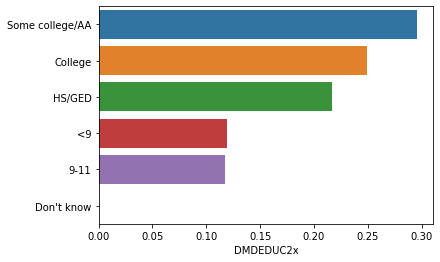

In [57]:
sns.barplot(x = countDMDE/countDMDE.sum(), y = countDMDE.index)
plt.show()

## Numerical summaries

A quick way to get a set of numerical summaries for a quantitative variable is with the describe data frame method. Below we demonstrate how to do this using the body weight variable (BMXWT). 

*good practice*:

As with many surveys, some data values are missing, so we explicitly drop the missing cases using the dropna method before generating the summaries.

#### BMXWT - Weight (kg)



In [67]:
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [63]:
x = da.BMXWT.dropna()  # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function

print(x.median())
print(np.percentile(x, 50))  # 50th percentile, same as the median
print(np.percentile(x, 75))  # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile

81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


In [76]:
da.BMXARMC

0       35.9
1       33.2
2       31.0
3       38.3
4       27.2
        ... 
5730    29.5
5731    42.3
5732    28.8
5733    30.6
5734    26.2
Name: BMXARMC, Length: 5735, dtype: float64

#### Good combination

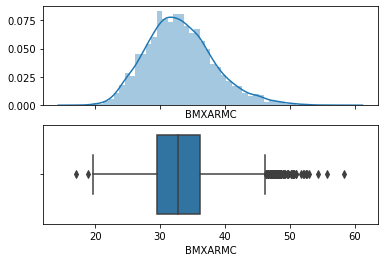

In [87]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
sns.distplot(da.BMXARMC, ax=ax1)
sns.boxplot(x = da.BMXARMC, ax=ax2)
plt.show()

**BPXSY1** Systolic blood pressure

Next we look at frequencies for a systolic blood pressure measurement (BPXSY1). "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89. Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.

**slicing data frame series**

Working with booleans is a good way to do descriptive analysis :)


In [92]:
da.BPXSY1.head()

0    128.0
1    146.0
2    138.0
3    132.0
4    100.0
Name: BPXSY1, dtype: float64

In [163]:
da.BPXSY1.loc[(da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)].count() / ((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)).count() #proportionz of pre hypertense people

0.3741935483870968

In [137]:
np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))

0.3741935483870968

In [130]:
(da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)

0        True
1       False
2        True
3        True
4       False
        ...  
5730    False
5731    False
5732    False
5733    False
5734    False
Length: 5735, dtype: bool

In [160]:
count = 0
for i in (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139):
    if i == True: count += 1
print(count, count/da.BPXSY1.count())

2146 0.3973338270690613


Next we calculate the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure.

In [158]:
da.loc[(da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)].BPXDI1

1       88.0
14      84.0
19      82.0
24      86.0
28      80.0
        ... 
5707    84.0
5708    82.0
5711    94.0
5713    82.0
5729    80.0
Name: BPXDI1, Length: 849, dtype: float64

In [152]:
np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)) #it sums every True (1) and splits that the total occurences

0.14803836094158676

In [151]:
count = 0
for i in (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89):
    if i == True: count += 1
print(count/((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)).count())

0.14803836094158676


Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure. Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.

Since the combined systolic and diastolic condition for pre-hypertension is somewhat complex, below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [148]:
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
np.mean(a | b)

0.43975588491717527

In [150]:
count = 0
for i in (a | b):
    if i == True: count += 1
print(count/b.count())

0.43975588491717527


The right way to do it (**my opinion**) is look individually to each column. In the above example, there is no upper limit for the column BPXSY1 and no inferior limit to BPXSY2. In this case, the algorythm might have selected pacients with high variation of blood pressure.

In [180]:
a = (da.BPXSY1 >= 120) & (da.BPXSY1 <= 139)
b = (da.BPXSY2 >= 120) & (da.BPXSY2 <= 139)
ab = (a & b)
count = 0
for i in (ab):
    if i == True: count+=1
print(count)

1719


In [183]:
c = (da.BPXDI1 >= 80) & (da.BPXDI1 <= 89)
d = (da.BPXDI2 >= 80) & (da.BPXDI2 <= 89)
cd = (c & d)
count = 0
for i in (cd):
    if i == True: count+=1
print(count)

516


In [188]:
for i in (ab & cd):
    if i == True: count+=1
print(count/(ab & cd).count())

0.18064516129032257


In [193]:
print((ab | cd).mean()) #if at least in one type of blood pressure the pacient has pre-hypertension
print((ab & cd).mean()) #if our criteria is more restrit

0.34437663469921537
0.045335658238884045


Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers. Typically this effect subsides if the blood pressure is measured several times in sequence. In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. BPXSY2 is the second measurement of systolic blood pressure). We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [209]:
df = (da.BPXSY1 - da.BPXSY2)
print(df.abs().mean())

df2 = (da.BPXDI1 - da.BPXDI2).abs()
print(np.mean(df2))

3.776494691748929
3.992922331905383


Continue on from graphical summaries: [link](https://www.coursera.org/learn/understanding-visualization-data/ungradedLab/3xH1O/lab)